# Data Preprocessing and Augmentation for MNIST Dataset

In this notebook, we will load the MNIST dataset, preprocess it by normalizing the pixel values, reshaping, applying standardization, and one-hot encoding the labels. Additionally, we will augment the data with transformations like rotations, zooms, and flips to enhance model generalization.

## Step 1: Import Necessary Libraries

We will start by importing TensorFlow, the Keras library for data preprocessing, and Scikit-learn for standardization.



In [7]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


Step 2: Load and Preprocess the MNIST Dataset
We will load the MNIST dataset and apply the following transformations:

Normalize the pixel values to the range [0, 1]
Reshape the images from 28x28 to 784-dimensional vectors
Apply standardization (zero mean and unit variance)
One-hot encode the labels

In [33]:
# Load the MNIST dataset as-is (no preprocessing yet)
def load_mnist_data_raw():
    """
    Load the MNIST dataset without any preprocessing.
    """
    (x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
    return (x_train, y_train), (x_test, y_test)

In [34]:
def process_data(x_train_raw, x_test_raw):
    """
    Process the MNIST data by normalizing, reshaping, and applying augmentations.
    """
    # Normalize pixel values to [0, 1]
    x_train = x_train_raw / 255.0
    x_test = x_test_raw / 255.0

    # Reshape to (28, 28, 1) for CNN input
    x_train = x_train.reshape(-1, 28, 28, 1)
    x_test = x_test.reshape(-1, 28, 28, 1)

    return x_train, x_test

In [39]:
def augment_data(x_train):
    """
    Augment the training data using transformations like rotations, shifts, and zooms.
    """
    datagen = ImageDataGenerator(
        rotation_range=12,      # Random rotation between -12 and 12 degrees
        width_shift_range=0.1,  # Randomly translate images horizontally by 10%
        height_shift_range=0.1, # Randomly translate images vertically by 10%
        fill_mode='nearest'     # How to fill the pixels after transformation
    )
    
    # Fit the data generator to the training data
    datagen.fit(x_train)
    return datagen

Training data shape (raw): (60000, 28, 28), Training labels shape: (60000,)
Test data shape (raw): (10000, 28, 28), Test labels shape: (10000,)


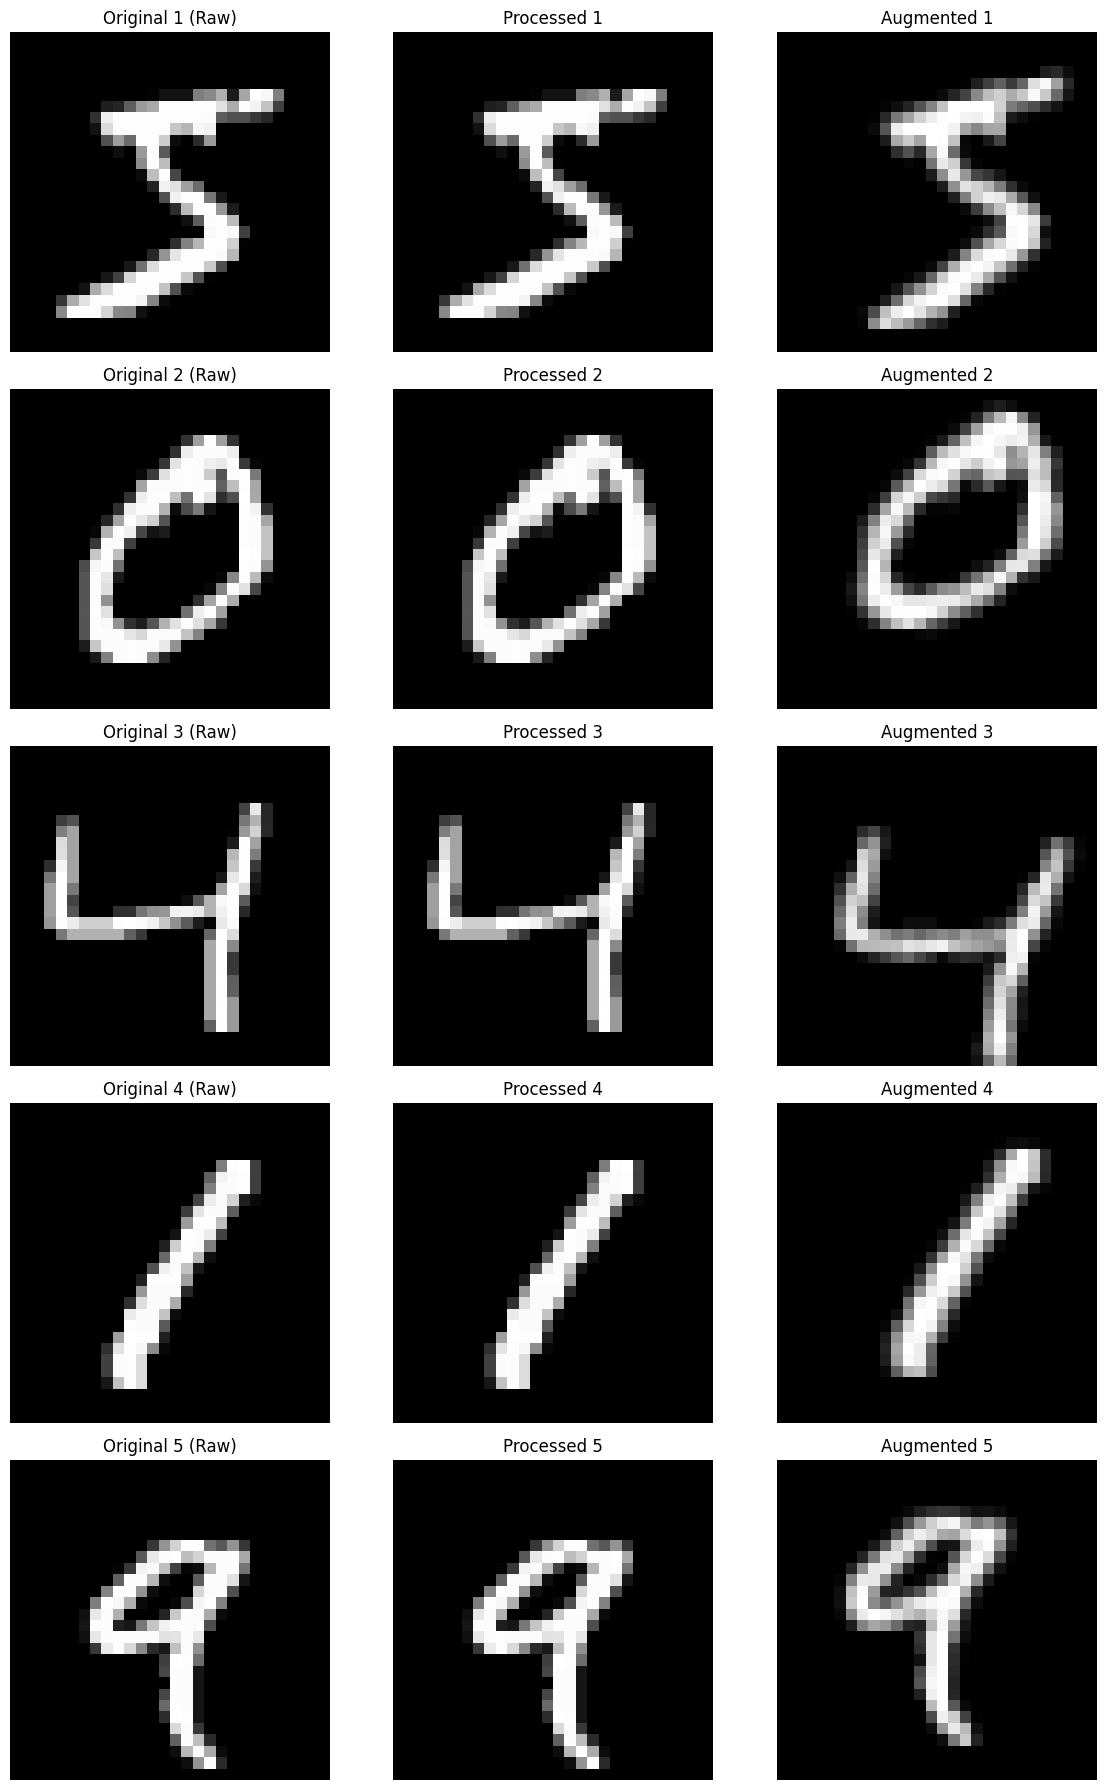

In [40]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Load the MNIST data in its raw form (no transformations yet)
(x_train_raw, y_train), (x_test_raw, y_test) = load_mnist_data_raw()

# Display basic information about the dataset
print(f"Training data shape (raw): {x_train_raw.shape}, Training labels shape: {y_train.shape}")
print(f"Test data shape (raw): {x_test_raw.shape}, Test labels shape: {y_test.shape}")

# Plot raw images before any transformations (first 5 images)
fig, axes = plt.subplots(5, 3, figsize=(12, 18))  # 5 rows, 3 columns for each image

for i in range(5):
    # Plot raw image (raw format, no transformations yet)
    axes[i, 0].imshow(x_train_raw[i], cmap='gray')
    axes[i, 0].axis('off')
    axes[i, 0].set_title(f"Original {i+1} (Raw)")

# Apply preprocessing (normalization and reshaping)
x_train, x_test = process_data(x_train_raw, x_test_raw)

# Plot processed images (after normalization and reshaping)
for i in range(5):
    axes[i, 1].imshow(x_train[i].reshape(28, 28), cmap='gray')
    axes[i, 1].axis('off')
    axes[i, 1].set_title(f"Processed {i+1}")

# Create the data augmentation generator for the training set using the custom augment_data function
datagen = augment_data(x_train)

# Get a batch of augmented images (use the first 5 images)
augmented_data = datagen.flow(x_train[:5], batch_size=1, shuffle=False)

# Plot augmented images after transformations
for i in range(5):
    augmented_image = next(augmented_data)
    axes[i, 2].imshow(augmented_image[0].reshape(28, 28), cmap='gray')
    axes[i, 2].axis('off')
    axes[i, 2].set_title(f"Augmented {i+1}")

plt.tight_layout()
plt.show()
